In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("D:\\Documents\\1569582940_googleplaystore")

In [3]:
df=pd.read_csv('googleplaystore.csv')

In [4]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
df['Size']=df['Size'].apply(lambda x: str(x).replace('M','')if 'M' in str(x) else x)
df['Size']=df['Size'].apply(lambda x: str(x).replace('Varies with device','nan')if 'Varies with device'in str(x) else x)

df['Size']=df['Size'].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)
df['Size']=df['Size'].apply(lambda x: float(x))
df= df[pd.notnull(df['Size'])]
df['Size'].dtype
                            

dtype('float64')

In [10]:
df['Size']

0        19.000
1        14.000
2         8.700
3        25.000
4         2.800
          ...  
10833     0.619
10834     2.600
10836    53.000
10837     3.600
10840    19.000
Name: Size, Length: 7723, dtype: float64

In [11]:
df['Reviews']=df['Reviews'].astype('float')

C:\Users\91766\AppData\Local\Temp\ipykernel_7464\3093225873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews']=df['Reviews'].astype('float')


In [12]:
df['Installs'].replace("\+","", inplace=True, regex=True)
df['Installs'].replace("\,","",inplace=True, regex=True)

C:\Users\91766\AppData\Local\Temp\ipykernel_7464\1091576655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'].replace("\+","", inplace=True, regex=True)
C:\Users\91766\AppData\Local\Temp\ipykernel_7464\1091576655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'].replace("\,","",inplace=True, regex=True)


In [13]:
df['Installs']=df['Installs'].astype('int')

C:\Users\91766\AppData\Local\Temp\ipykernel_7464\2883636082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs']=df['Installs'].astype('int')


In [14]:
df['Price'].replace("\$","", inplace=True, regex=True)

C:\Users\91766\AppData\Local\Temp\ipykernel_7464\1553386089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'].replace("\$","", inplace=True, regex=True)


In [15]:
df['Price']=df['Price'].astype('float')

C:\Users\91766\AppData\Local\Temp\ipykernel_7464\4027358656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].astype('float')


In [16]:
df['Rating'].value_counts()

Rating
4.4    834
4.5    821
4.3    818
4.2    739
4.6    646
4.1    593
4.0    480
4.7    421
3.9    333
3.8    272
5.0    269
4.8    216
3.7    198
3.6    158
3.5    153
3.4    115
3.3     98
4.9     86
3.0     74
3.1     62
3.2     59
2.9     43
2.8     42
2.6     24
2.7     23
2.3     20
2.5     19
2.4     19
1.0     16
2.2     14
1.9     12
2.0     11
1.7      8
1.8      8
2.1      8
1.6      4
1.4      3
1.5      3
1.2      1
Name: count, dtype: int64

In [17]:
df=df[df['Reviews']<df['Installs']]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7715 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7715 non-null   object 
 1   Category        7715 non-null   object 
 2   Rating          7715 non-null   float64
 3   Reviews         7715 non-null   float64
 4   Size            7715 non-null   float64
 5   Installs        7715 non-null   int32  
 6   Type            7715 non-null   object 
 7   Price           7715 non-null   float64
 8   Content Rating  7715 non-null   object 
 9   Genres          7715 non-null   object 
 10  Last Updated    7715 non-null   object 
 11  Current Ver     7715 non-null   object 
 12  Android Ver     7715 non-null   object 
dtypes: float64(4), int32(1), object(8)
memory usage: 813.7+ KB


In [19]:
df[(df['Type']=='Free')<(df['Price']==0)].shape[0]

0

In [20]:
df['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [ ]:
#UNIVARIATE ANALYSIS

<Axes: xlabel='Price'>

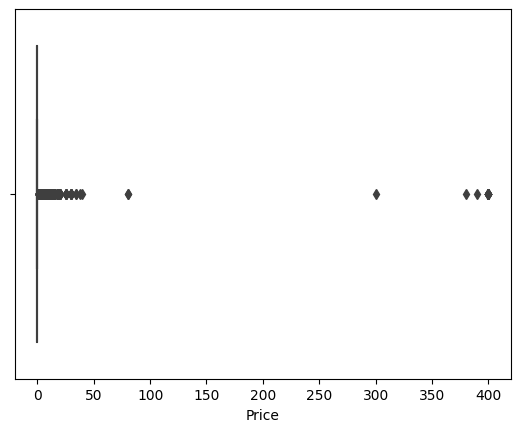

In [21]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='Reviews'>

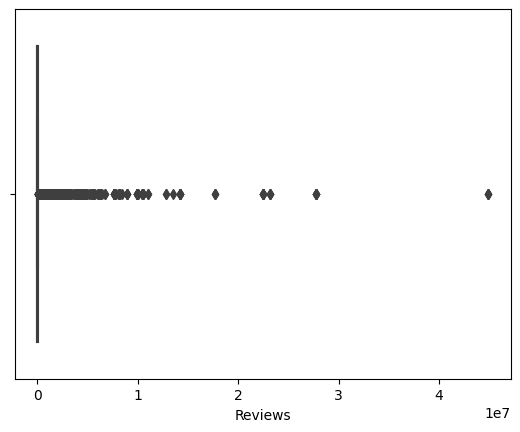

In [22]:
sns.boxplot(x=df['Reviews'])

(array([  17.,   18.,   39.,   72.,  132.,  408.,  781., 1406., 3212.,
        1630.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

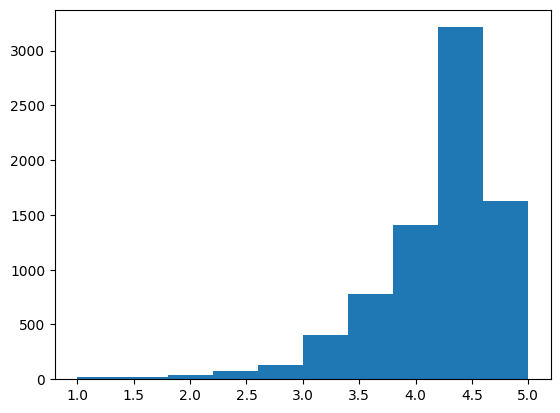

In [23]:
plt.hist(df['Rating'])

(array([3243., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e-03, 1.000765e+01, 2.000680e+01, 3.000595e+01,
        4.000510e+01, 5.000425e+01, 6.000340e+01, 7.000255e+01,
        8.000170e+01, 9.000085e+01, 1.000000e+02]),
 <BarContainer object of 10 artists>)

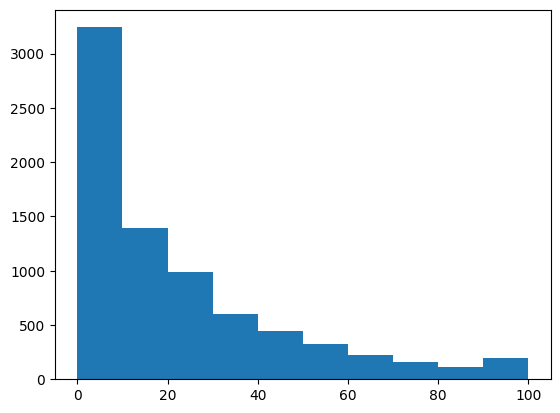

In [24]:
plt.hist(df['Size'])

In [25]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1.500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26.000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1.800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8.700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2.600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2.900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22.000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,0.965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [26]:
df.drop(df[df['Price']>200].index,inplace=True)

In [27]:
df.shape

(7700, 13)

In [28]:
df[df['Reviews']>2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998.0,16.0,100000000,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892.0,11.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120.0,3.3,100000000,Free,0.0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922.0,40.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988.0,11.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Need for Speed™ No Limits,GAME,4.4,3344300.0,22.0,50000000,Free,0.0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386.0,58.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646.0,71.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923.0,25.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [29]:
df.drop(df[df['Reviews']>2000000].index,inplace=True)

In [30]:
df.shape

(7481, 13)

In [31]:
np.percentile(df['Installs'],10)

1000.0

In [32]:
np.percentile(df['Installs'],25)

10000.0

In [33]:
np.percentile(df['Installs'],50)

100000.0

In [34]:
np.percentile(df['Installs'],70)

1000000.0

In [35]:
np.percentile(df['Installs'],90)

10000000.0

In [36]:
np.percentile(df['Installs'],95)

10000000.0

In [37]:
np.percentile(df['Installs'],99)

50000000.0

In [38]:
df[df['Installs']>10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861.0,35.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
225,Secure Folder,BUSINESS,3.8,14760.0,8.6,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859.0,35.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
346,imo beta free calls and text,COMMUNICATION,4.3,659395.0,11.0,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10378,BMX Boy,GAME,4.2,839206.0,12.0,50000000,Free,0.0,Everyone,Racing,"September 20, 2017",1.16.33,4.1 and up
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334.0,27.0,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136.0,54.0,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613.0,21.0,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up


In [39]:
df.drop(df[df['Installs']>10000000].index,inplace=True)

In [40]:
df.shape

(7305, 13)

In [ ]:
#bivariate analysis


<Axes: xlabel='Rating', ylabel='Price'>

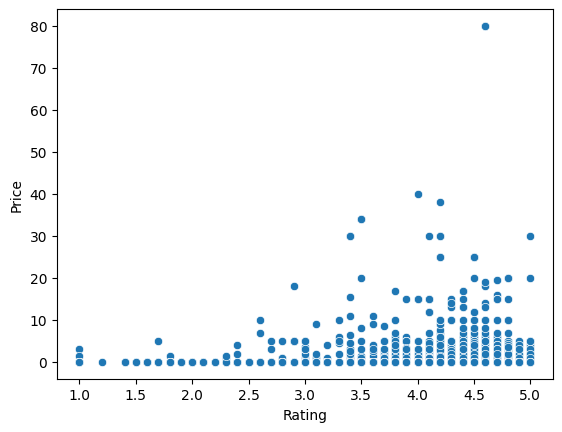

In [41]:
sns.scatterplot(x=df['Rating'],y=df['Price'])

<Axes: xlabel='Rating', ylabel='Size'>

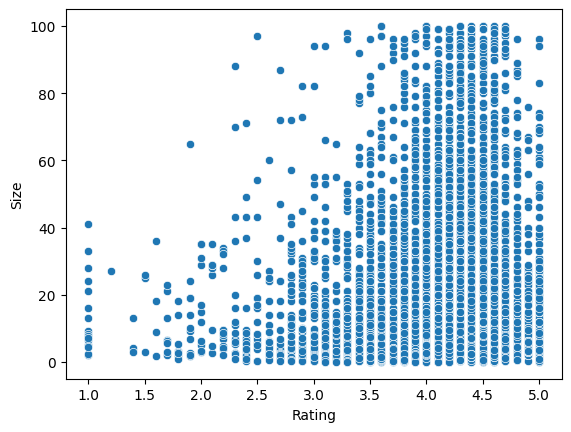

In [42]:
sns.scatterplot(x=df['Rating'],y=df['Size'])

<Axes: xlabel='Rating', ylabel='Reviews'>

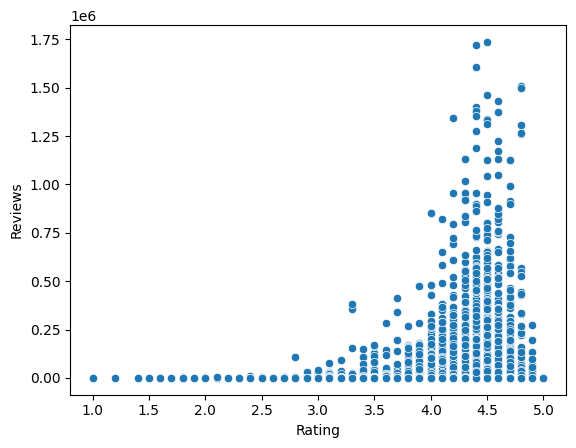

In [43]:
sns.scatterplot(x=df['Rating'],y=df['Reviews'])

<Axes: xlabel='Rating', ylabel='Content Rating'>

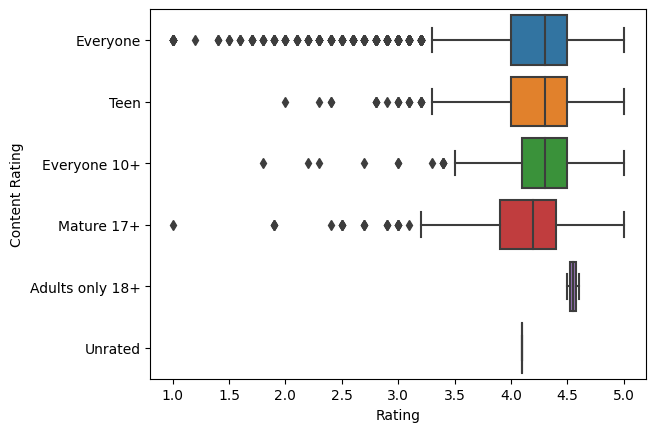

In [44]:
sns.boxplot(x=df['Rating'],y=df['Content Rating'])


<Axes: xlabel='Rating', ylabel='Category'>

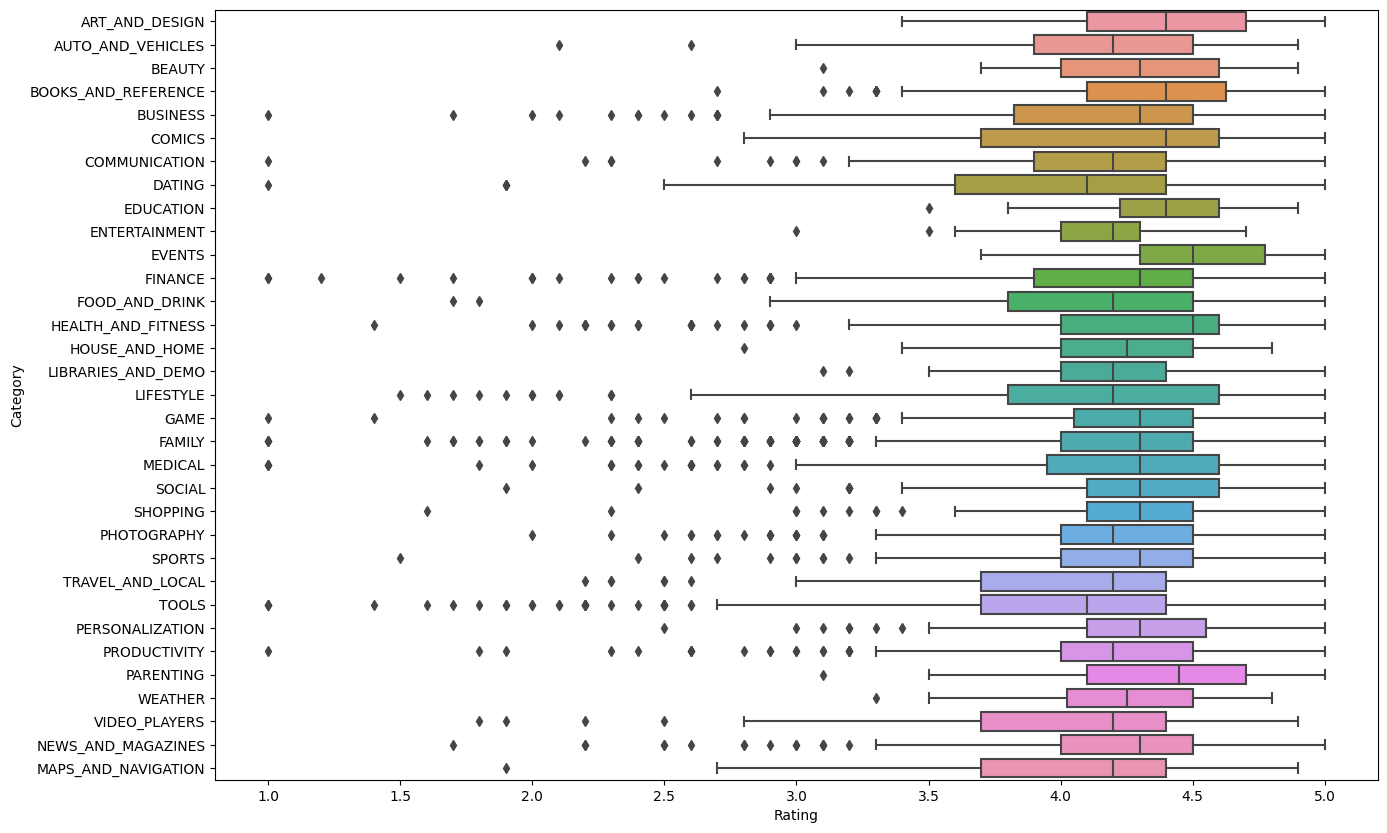

In [45]:
plt.figure(figsize=[15,10])
sns.boxplot(x=df['Rating'],y=df['Category'])


In [ ]:
#Data preprocessing

In [46]:
inp1=df.copy()

In [47]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [48]:
inp1['Reviews']=np.log1p(inp1['Reviews'])

In [49]:
inp1['Reviews']

0         5.075174
1         6.875232
2        11.379520
4         6.875232
5         5.123964
           ...    
10833     3.806662
10834     2.079442
10836     3.663562
10837     1.609438
10840    12.894981
Name: Reviews, Length: 7305, dtype: float64

In [50]:
inp1['Installs']=np.log1p(inp1['Installs'])

In [51]:
inp1['Installs']

0         9.210440
1        13.122365
2        15.424949
4        11.512935
5        10.819798
           ...    
10833     6.908755
10834     6.216606
10836     8.517393
10837     4.615121
10840    16.118096
Name: Installs, Length: 7305, dtype: float64

In [52]:
inp1.drop(['App','Last Updated','Current Ver','Android Ver','Type'],axis=1,inplace=True)

In [53]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8.7,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2.8,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5.6,10.819798,0.0,Everyone,Art & Design


In [54]:
inp2=inp1.copy()

In [55]:
x=pd.get_dummies(inp2['Category'],prefix='Category').astype(int)

In [56]:
y=pd.get_dummies(inp2['Content Rating'],prefix='Content').astype(int)


In [57]:
z=pd.get_dummies(inp2['Genres'],prefix='Genres').astype(int)

In [58]:
inp2=pd.concat([inp2,x,y,z],axis=1)

In [59]:
del inp2['Category']
del inp2['Content Rating']
del inp2['Genres']

In [60]:
inp2

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19.000,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14.000,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8.700,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2.800,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5.600,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,3.806662,0.619,6.908755,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10834,4.0,2.079442,2.600,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,3.663562,53.000,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,1.609438,3.600,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
inp2.shape

(7305, 156)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics

In [63]:
df2=inp2
X=df2.drop('Rating',axis=1)
Y=df2['Rating']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=5)
                                                    

In [64]:
lin_reggressor = LinearRegression()
lin_reggressor.fit(X_train,Y_train)

LinearRegression()

In [65]:
R2_Score_train_data = round(lin_reggressor.score(X_train,Y_train),3)
print("The R2 Value of The Training Set is : {}".format(R2_Score_train_data))

The R2 Value of The Training Set is : 0.154


In [66]:
Y_pred= lin_reggressor.predict(X_test)
R2_Score_test_data = metrics.r2_score(Y_test,Y_pred)
R2_Score_test_data

0.12842498504931243

In [67]:
R2_Score_train_data = round(lin_reggressor.score(X_test,Y_test),3)
print("The R2 Value of the Test Set is: {}". format(R2_Score_test_data))

The R2 Value of the Test Set is: 0.12842498504931243
